64.73203682899475


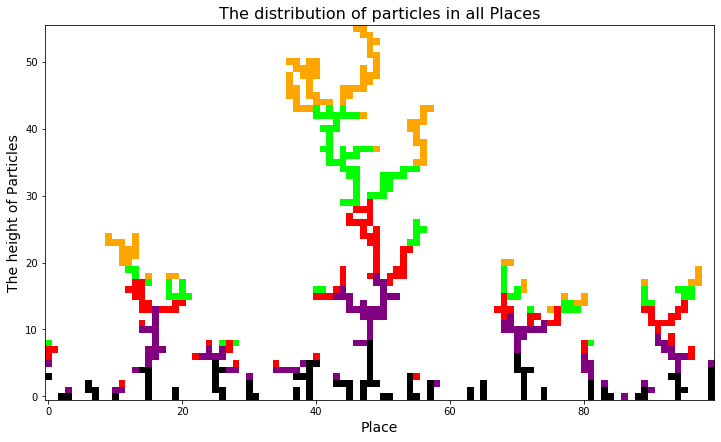

In [18]:
import numpy as np
import pylab as plb
import matplotlib
import random
import time
from matplotlib import colors

plb.rcParams['figure.figsize'] = 12,8
T11 = time.time()

N = 100   # The number of Rooms
t = 500   # Hom many seeds?
d = 1       # Iteration of Code
StopNo = 5  #number of stops
h_rain = 10
cmap = colors.ListedColormap(['white','black','purple','red','lime','orange'])
Samples = []
dx = t//StopNo
Stops = [i*dx for i in range(1,StopNo+1)]

def Height(X) :
    """The height of the distribution (Max in all heights)"""
    return max([len(x) for x in X])-1
def RW_IT(Place):
    """Random walk of a single particle with specified probablities, Returns new position of the particle"""
    p1 = 0.25
    p2 = 0.25
    p3 = 0.25
    p4 = 1 - (p1+p2+p3)
    rand = random.random()
    
    if 0<rand<p1:
        Place[1] += 1
    elif p1<rand<p1+p2:
        Place[0] += 1
    elif p1+p2<rand<p1+p2+p3:
        Place[1] -= 1
    else:
        Place[0] -= 1
    
    return Place
def Visualize(xAxis,width,n,*args):
    """Draws the lattice of distribution by different color (n Colors) , it is somewhat weird"""
    global StopNo
    global Stops
    for ar in args:
        for li in ar:
            li.remove(0)
    Cuts = []
    for i,f in enumerate(args):
        if i == 0:
            Cuts.append(f[:])
        else:
            Cuts.append([])
            for h,elem in enumerate(f): 
                NewArray = np.array(elem[len(args[i-1][h]):])
                NewArray[NewArray == 1] = i%n +1
                Cuts[-1].append(NewArray.tolist())
    Data = []
    for i in range(N):
        TempArr = []
        for f in Cuts:
            TempArr += f[i]
        Data.append(TempArr)
    global cmap
    maX = max([len(dt) for dt in Data])
    for dat in Data:
        while len(dat)<maX:
            dat.append(0)

    plb.imshow(np.array(Data).T,cmap=cmap,origin= [0,1])
    plb.title("The distribution of particles in all Places",fontsize=16)
    plb.xlabel("Place",fontsize=14)
    plb.ylabel("The height of Particles",fontsize=14)
    plb.show()
    
def is_adhesivable(X,P,N):
    """checks whether the particle(P) can seat in specified position? X is lattice matrix"""
    x , y = P[0] , P[1] + Height(X)
    #print(x,y,'is',end=" / ")
    """if P[1] > 1:
        print('randed')
        return False"""
    if len(X[(x-1)%N]) > y and X[(x-1)%N][y]:
        #print('l',end=" / ")
        return 'l'
    elif len(X[(x+1)%N]) > y and X[(x+1)%N][y]:
        #print('r',end=" / ")
        return 'r'
    elif len(X[x%N]) > y-1 and X[x%N][y-1]:
        #print('b',end=" / ")
        return 'b'
    elif len(X[x%N]) > y+1 and X[x%N][y]:
        #print('b',end=" / ")
        return 't'
    elif y==0:
        #print('tah',end=" / ")
        return 'e'
    else:
        #print('False',end=" / ")
        #print()
        return False

def Move_the_seed(X,N):
    """Generates a seed and Randomly walks it untill it seats somwhere and returns the coordinates of where it seat"""
    global h_rain
    Point = np.zeros(2,int)
    r = random.randint(0,N-1)
    Point[0] , Point[1] = r , h_rain
    while not is_adhesivable(X,Point,N):
        Point = RW_IT(Point)
        if(Point[1] >Height(X) + h_rain):    #+H(X)
            #print('TUV',Point[1])
            Point[0] , Point[1] = random.randint(0,N-1) , h_rain
    return Point



for Iterations in range(0,d):
    Rooms = [ [0] for i in range(N)]
    for i in range(t+1):
        new_place = Move_the_seed(Rooms,N)
        code = is_adhesivable(Rooms,new_place,N)
        
        x,y = new_place[0],new_place[1]
        
        if code == 'l':
            zeros = len(Rooms[(x-1)%N]) - len(Rooms[x%N]) -1
            for j in range(zeros):
                Rooms[x%N].append(0)
            Rooms[x%N].append(1)
        elif code == 'r':
            zeros = len(Rooms[(x+1)%N]) - len(Rooms[x%N]) -1
            for j in range(zeros):
                Rooms[x%N].append(0)
            Rooms[x%N].append(1)
        elif code == 'b':
            Rooms[x%N].append(1)
        elif code == "t":
            Rooms[x%N][y] = 1
        elif code == 'e':
            Rooms[x%N].append(1)
    
        if i in Stops:
            Samples.append([[k for k in P] for P in Rooms])  #Why do that?
MAx = Height(Rooms)+1
for Rm in Rooms:
    Rm.remove(0)
    while len(Rm)<MAx:
        Rm.append(0)
        

#Uncomment to show binary representation
#plb.imshow(np.array(Rooms).T,cmap='binary',origin=0)

T22 = time.time()
print(T22-T11)

#Uncomment to show colorful representation
Visualize(np.arange(N),1,N,*Samples)

